## Project 17 - Airbnb Data Analytics 

#### Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in San Diego, California for 2019.

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
#Reading the data 
df = pd.read_csv('Airbnb data.csv')

In [6]:
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [7]:
df.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   survey_id             18723 non-null  int64  
 2   host_id               18723 non-null  int64  
 3   room_type             18723 non-null  object 
 4   country               0 non-null      float64
 5   city                  18723 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18723 non-null  object 
 8   reviews               18723 non-null  int64  
 9   overall_satisfaction  18723 non-null  float64
 10  accommodates          18723 non-null  int64  
 11  bedrooms              18723 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 18723 non-null  float64
 14  minstay               0 non-null      float64
 15  name               

### Performing EDA 

In [11]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Handle missing values
df['country'].fillna(df['country'].mean(), inplace=True)

Missing values:
room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18723
city                        0
borough                 18723
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
name                       52
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64


In [12]:
df.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.872300e+04,18723.0,1.872300e+04,0.0,0.0,18723.000000,18723.000000,18723.000000,18723.000000,0.0,18723.000000,0.0,18723.000000,18723.000000
mean,1.120568e+07,1476.0,3.577612e+07,NaN,NaN,16.741548,3.301127,2.922021,1.430380,NaN,166.599477,NaN,52.365261,4.888585
std,6.082192e+06,0.0,3.758103e+07,NaN,NaN,33.522630,2.213558,1.327524,0.879019,NaN,108.943849,NaN,0.015142,0.034537
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,12.000000,NaN,52.296200,4.763264
25%,6.050608e+06,1476.0,7.140879e+06,NaN,NaN,2.000000,0.000000,2.000000,1.000000,NaN,108.000000,NaN,52.355254,4.864344
50%,1.228287e+07,1476.0,1.988641e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364628,4.885994
75%,1.661084e+07,1476.0,5.202680e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,192.000000,NaN,52.374797,4.907480
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689


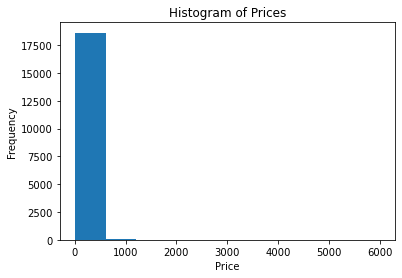

In [14]:
##Histogram of prices
plt.hist(df['price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')
plt.show()

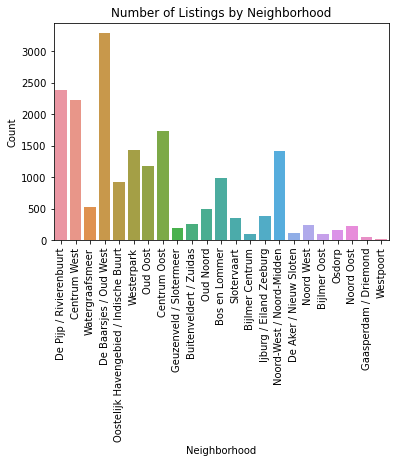

In [15]:
sns.countplot(x='neighborhood', data=df)
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Number of Listings by Neighborhood')
plt.xticks(rotation=90)
plt.show()

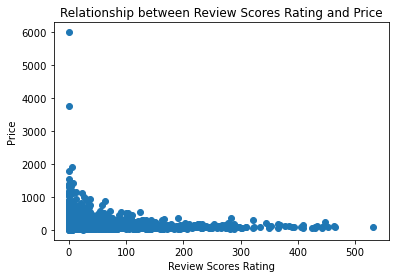

In [17]:
plt.scatter(df['reviews'], df['price'])
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.title('Relationship between Review Scores Rating and Price')
plt.show()

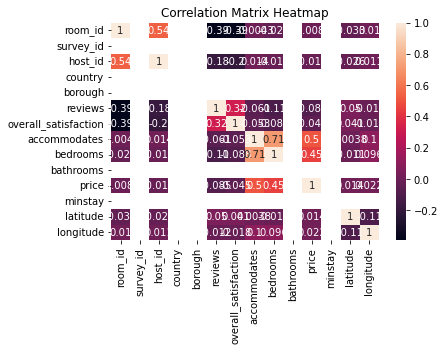

In [18]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

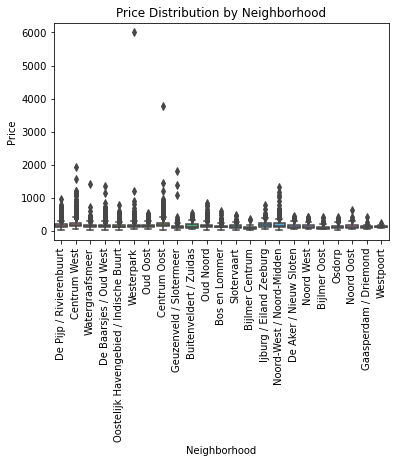

In [19]:
sns.boxplot(x='neighborhood', y='price', data=df)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Price Distribution by Neighborhood')
plt.xticks(rotation=90)
plt.show()

In [21]:
#Encoding categorical variables
encoded_data = pd.get_dummies(df, columns=['neighborhood'])

# Example: Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['price']])

In [27]:
# 1. Who are the top earners among the hosts?
top_earners = df.groupby('name')['price'].sum().nlargest(10)
print("Top Earners:")
print(top_earners)

Top Earners:
name
Zonnige woonboot,centraal en rustig                   6000.0
Amsterdam                                             4936.0
One public bedroom                                    3770.0
Spacious family house with garden                     2303.0
AmsterdamBase                                         1920.0
Welkom in noordzijde                                  1799.0
Spacious apartment in Amsterdam                       1680.0
Ultra luxe dreamboat, unforgettable stay promised!    1558.0
Lovely apartment near Vondelpark                      1487.0
Luxurious 3br 110m² houseboat in Amsterdam Centre!    1428.0
Name: price, dtype: float64


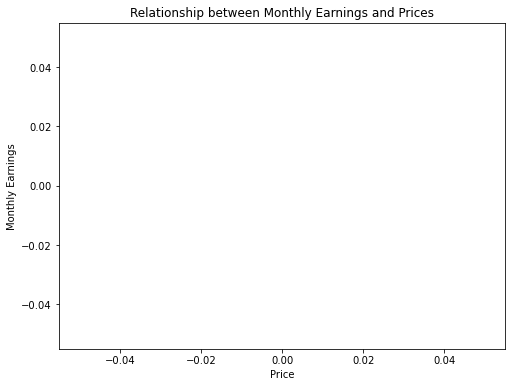

In [33]:
#Is there any relationship between monthly earnings and prices?

df['last_modified'] = pd.to_datetime(df['last_modified'])
df['month'] = df['last_modified'].dt.month
df['monthly_earnings'] = df['price'] * df['minstay']
monthly_stats = df.groupby('month').agg({'monthly_earnings': 'mean', 'price': 'mean'})
monthly_stats.plot(x='price', y='monthly_earnings', kind='scatter', figsize=(8, 6))
plt.xlabel('Price')
plt.ylabel('Monthly Earnings')
plt.title('Relationship between Monthly Earnings and Prices')
plt.show()

In [35]:
#Is any particular location getting the maximum number of bookings?
max_bookings_neighborhood = df['neighborhood'].value_counts().idxmax()
print("Neighborhood with Maximum Bookings:")
print(max_bookings_neighborhood)

Neighborhood with Maximum Bookings:
De Baarsjes / Oud West


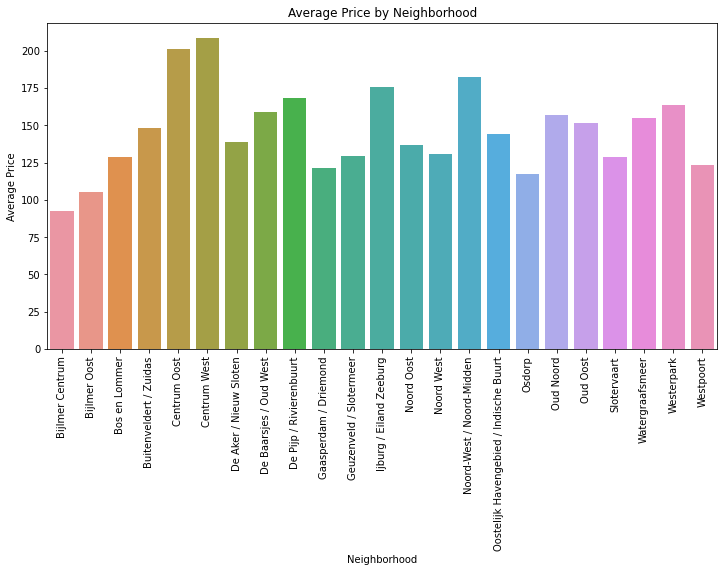

In [36]:
#Price relation with respect to location
average_price_by_neighborhood = df.groupby('neighborhood')['price'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_neighborhood.index, y=average_price_by_neighborhood.values)
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighborhood')
plt.show()

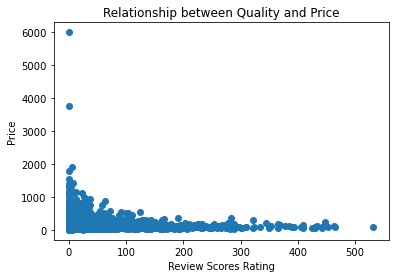

In [39]:
#Relationship between quality and price
average_price_by_quality = df.groupby('reviews')['price'].mean()
plt.scatter(df['reviews'], df['price'])
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.title('Relationship between Quality and Price')
plt.show()

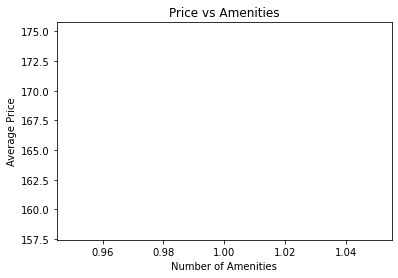

In [45]:
#Price vs amenities
df['room_type'] = df['room_type'].str.count(',') + 1
average_price_by_amenities = df.groupby('room_type')['price'].mean()
plt.plot(average_price_by_amenities.index, average_price_by_amenities.values)
plt.xlabel('Number of Amenities')
plt.ylabel('Average Price')
plt.title('Price vs Amenities')
plt.show()

In [49]:
#calculate the proportion of each bedroom value 
bedroom_proportions = df['bedrooms'].value_counts() / len(df)

In [50]:
print(bedroom_proportions)

1.0     0.592907
2.0     0.237996
3.0     0.077124
0.0     0.061635
4.0     0.025263
5.0     0.003311
6.0     0.001015
10.0    0.000267
7.0     0.000214
8.0     0.000160
9.0     0.000107
Name: bedrooms, dtype: float64


In [52]:
#Dropping the values 
airbnb_data = df[df['bedrooms'] != 0]
print(airbnb_data)

        room_id  survey_id    host_id  room_type  country       city  borough  \
0      10176931       1476   49180562          1      NaN  Amsterdam      NaN   
1       8935871       1476   46718394          1      NaN  Amsterdam      NaN   
2      14011697       1476   10346595          1      NaN  Amsterdam      NaN   
3       6137978       1476    8685430          1      NaN  Amsterdam      NaN   
4      18630616       1476   70191803          1      NaN  Amsterdam      NaN   
...         ...        ...        ...        ...      ...        ...      ...   
18718  17789893       1476   47501089          1      NaN  Amsterdam      NaN   
18719  16877166       1476   67093870          1      NaN  Amsterdam      NaN   
18720  19859427       1476   29724632          1      NaN  Amsterdam      NaN   
18721  17132164       1476  115156569          1      NaN  Amsterdam      NaN   
18722   7605782       1476   39503013          1      NaN  Amsterdam      NaN   

                  neighborh

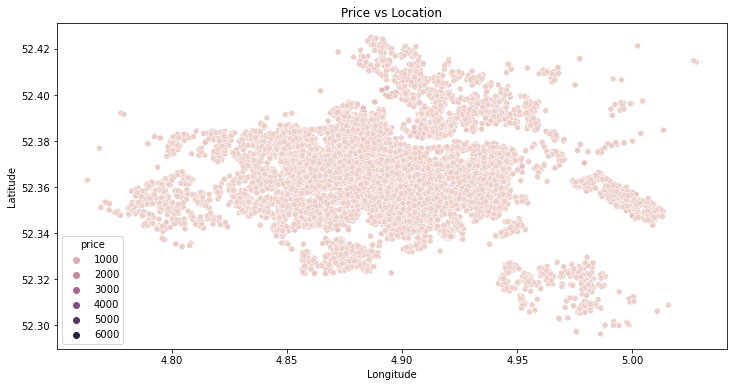

In [53]:
#Price vs location
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price vs Location')
plt.show()